In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# K Means

In [2]:
X = np.array([[1,2], [1,4], [1,0], [10,2], [10,4], [10,0]])

kmeans = KMeans(n_clusters=2, random_state=0)                    # Creating 2 clusters

In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [4]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [5]:
kmeans.labels_         # It created 2 labels

array([1, 1, 1, 0, 0, 0])

In [6]:
y = np.array([[0,0], [12,3]])  # Data to be predicted, test data

kmeans.predict(y)

array([1, 0])

> First datapoint belongs to cluster 1 and second datapoint of array belongs to 0 cluster.

In [7]:
# Checking centers of clusters

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [8]:
# It's a WCSS , tells strength

kmeans.inertia_

16.0

#### Checking Performance

In [9]:
labels = kmeans.labels_

silhouette_score(X, labels=labels)

0.7133477791749615

> Silhoutte score rating is from -1 to 1. Since it's near 1 so it's good!

#### Plotting with Centroid

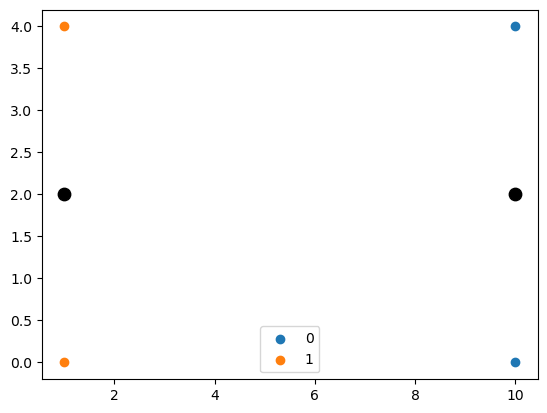

In [10]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

#plotting the results:

for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [11]:
u_labels = np.unique(labels)
u_labels

array([0, 1])

## Using Real Dataset

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# Selecting the features

X = df.iloc[:, [3,4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [15]:
wcss = []
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels=labels)
    wcss.append(kmeans.inertia_)
    print(f"Score of k={i} is {round(score,2)*100} with intertia = {round(kmeans.inertia_,2)}")

# k = 5 performed best.

Score of k=2 is 30.0 with intertia = 181363.6
Score of k=3 is 47.0 with intertia = 106348.37
Score of k=4 is 49.0 with intertia = 73679.79
Score of k=5 is 55.00000000000001 with intertia = 44448.46
Score of k=6 is 54.0 with intertia = 37233.81
Score of k=7 is 53.0 with intertia = 30259.66
Score of k=8 is 46.0 with intertia = 25011.84
Score of k=9 is 46.0 with intertia = 21862.09


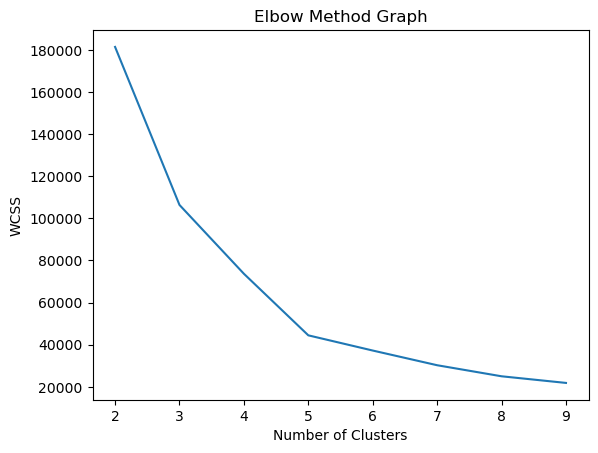

In [16]:
# Plotting inertia

plt.plot(range(2,10), wcss)
plt.title('Elbow Method Graph')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show();

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Checking our unique labels

np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

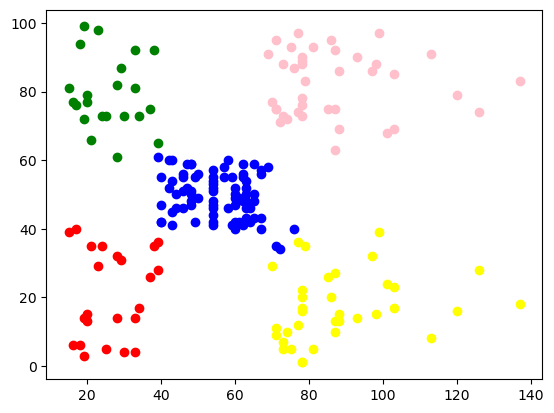

In [20]:
colors = ['blue', 'yellow', 'red', 'green', 'pink']
for label_no,color in zip(range(0,5),colors):
    plt.scatter(X[y_kmeans==label_no,0], X[y_kmeans==label_no,1], c=color)